#Eigenfaces

Load the principal components and a few sample faces

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io as sio

mat_contents = sio.loadmat('data/sample_faces.mat')         # This file contains 10 example faces from the training set
faces = mat_contents['faces']
mat_contents = sio.loadmat('data/eigenface_components.mat') # This file contains the first 250 principal components
Upca = mat_contents['Upca']
mat_contents = sio.loadmat('data/eigenface_var.mat')        # This file contains the singular values of the components
var = mat_contents['var']
mat_contents = sio.loadmat('data/eigenface_points.mat')     # This file contains a set of 400 low-dimensional faces
points = mat_contents['test']

Let's take a look at some of the sample faces

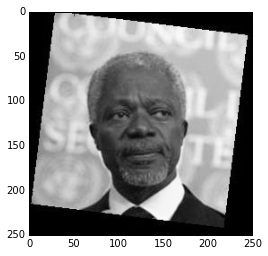

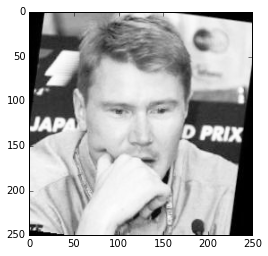

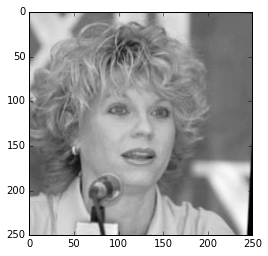

In [2]:
# The faces are stored in a 62500x10 matrix where a column of the matrix contains the pixel values
# of the image with each column of pixels placed one after the other
for i in range(1,4):   # This will plot the first 3 faces in the set "faces"
    fig = plt.figure()
    face = faces[:,i]
    face = np.reshape(face, (250,250), order='F') # We need to reshape the vector into a 250x250 image
    plt.imshow(face, cmap=cm.Greys_r)

Now let's see what happens when project these faces onto the first 50 principal components

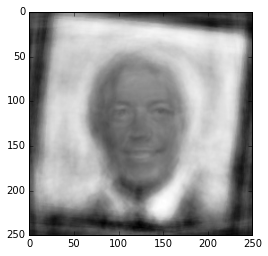

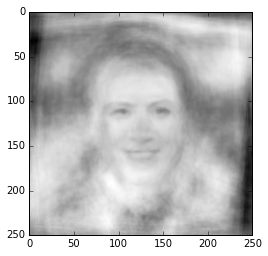

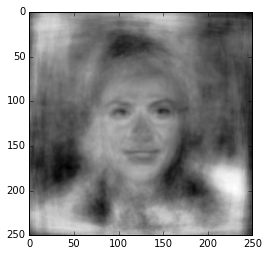

In [3]:
# Your Code Here:
d = 100 #STUDENT, adjust this value to control the number of principal components used
# you can set d to be any value between 1 and 100
## # End Code #

for i in range(1,4):   # This will plot the first 3 faces in the set "faces"
    fig = plt.figure()
    face = faces[:,i]
    face = np.dot(Upca[:,0:d].T, face)    # Project down into the d dimensional space
    face = np.dot(Upca[:,0:d], face)      # Reconstruct the original image
    face = np.reshape(face, (250,250), order='F')
    plt.imshow(face, cmap=cm.Greys_r)

Let's take a look at what information is contained in the first 5 principal components to get an idea of what each component is adding to the image

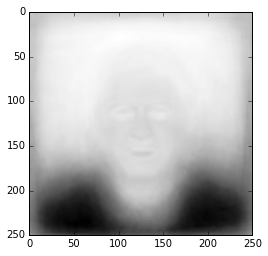

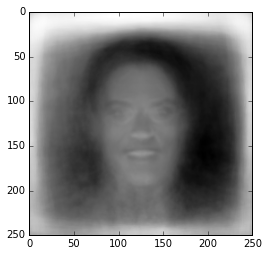

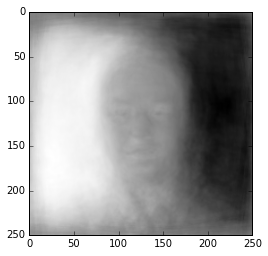

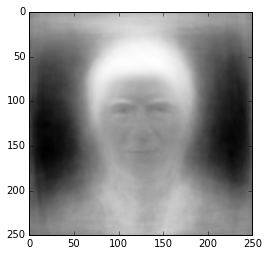

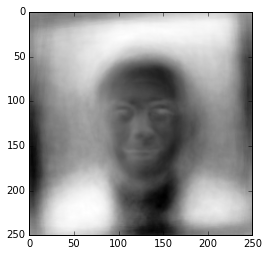

In [4]:
# Your Code Here:
for i in range(1,6): #STUDENT, adjust this range to see what information is contained in other principal components
    fig = plt.figure()
    face = Upca[:,i]
    face = np.reshape(face, (250,250), order='F')
    plt.imshow(face, cmap=cm.Greys_r)

The first two principal components capture the largest amount of variance in the data set.  Therefore, we can attempt to visualize the data set by plotting the first two dimensions of the transformed faces.

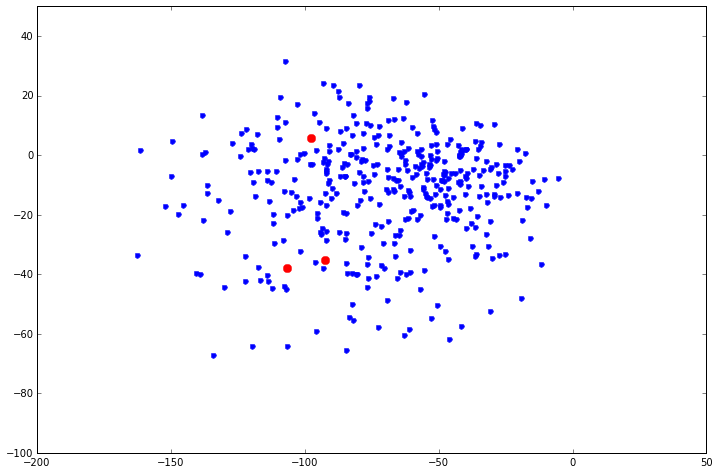

In [5]:
# Set up the plot so that it's the same size regardless of the data we plot
fig = plt.figure(figsize=(12,8))
plt.axes(xlim=(-200,50), ylim=(-100,50))

# Your Code Here:
#STUDENT, adjust these values to plot different dimensions of the low-dimensional faces
x = 0 # This is the index of the principal component to plot on the x axis
y = 1 # This is the index of the principal component to plot on the y axis
## # End Code #
# Plot the set of 400 faces picked randomly from the data set
plt.plot(points[x,:],points[y,:],'.b',markersize=10)
lowFaces = np.dot(Upca.T, faces)

# Plot the 3 sample faces from above as red points to see where they lie compared to the data
r=range(1,4)
plt.plot(lowFaces[x,r],lowFaces[y,r],'.r',markersize=16)


Because we can compress an image of a face to a lower dimensional space, we can try to generate a "random" face by picking a point in the low dimensional space and then reconstructing the resulting image by multiplying by the transformation matrix U.  Let's see what kind of results we can get.

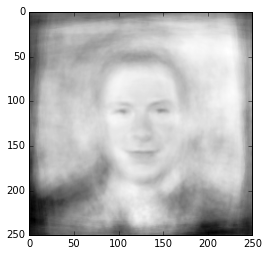

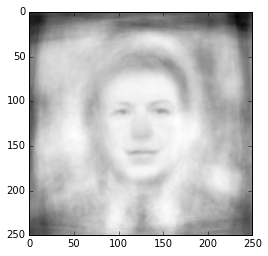

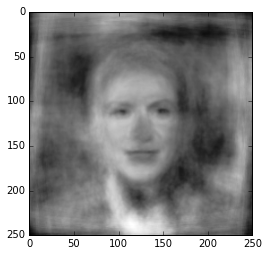

In [6]:
# We want to generate a random vector, but we don't want to pick a random point that lies far away
# from the training data.  Therefore, we use the singular values and the mean of the training data to
#ensure that the random vector is close to the training data

d = 100 #STUDENT, adjust this value to control the number of principal components used
# you can set d to be any value between 1 and 100

cov = np.diag(np.asarray(var.T[0])) # This matrix uses the singular values to specify
                                    # the amount of variance in each dimension
cov = cov[0:d,0:d]
mean = np.mean(points, axis=1)  # We use the set of 400 examples to approximate the mean for each principal component

for i in range(1,4):    # Let's generate a few examples
    fig = plt.figure()
    face = np.asmatrix(np.random.multivariate_normal(mean[0:d],cov)).T
    face = np.dot(Upca[:,0:d], face)      # Transform the d-dimensional vector to the 250x250 image space
    face = np.reshape(face, (250,250), order='F')
    plt.imshow(face, cmap=cm.Greys_r)